## Diabetes with Logistic Rrgression

In [64]:
## import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [17]:
## read the Data file
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
## null value check
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI
- Above mentioned the row have min value is 0 but in real that column have some value so we can update mean value

In [20]:
#df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

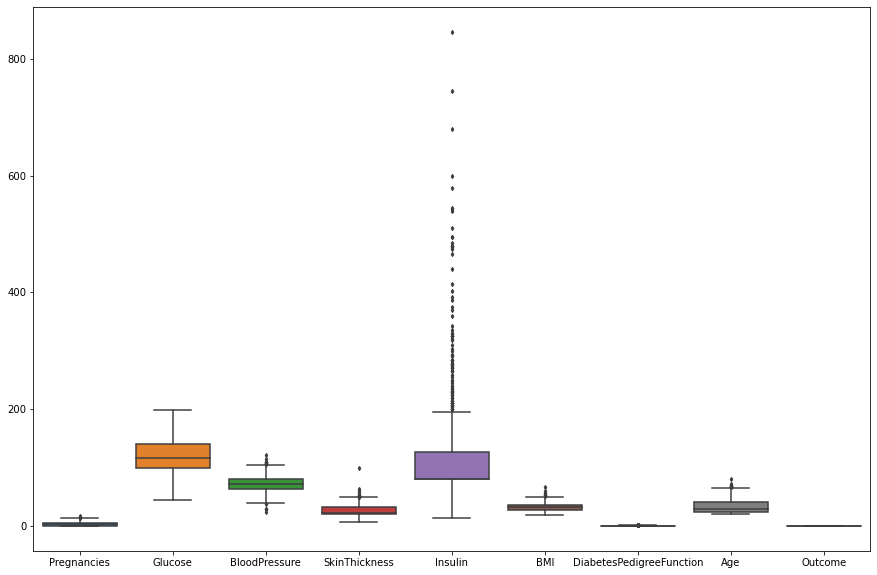

In [22]:
## check the data have outliers or not
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax,fliersize=3)

In [43]:
## Segregate the independent and dependent feature
X=df.iloc[0:,:-1]
y=df.iloc[:,-1]

In [44]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [45]:
## Seprate the datset train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
## Standard scaler and scaler pickle file save
import pickle
from sklearn.preprocessing import StandardScaler


In [69]:
def scaledvalue(xtrain,xtest):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(xtrain)
    x_test_scaled=scaler.fit_transform(xtest)
    pickle.dump(scaler,open('Diabetesscaler.pkl','wb'))
    return x_train_scaled,x_test_scaled
    

In [70]:
X_train_scaled,X_test_scaled=scaledvalue(X_train,X_test)

In [51]:
log_reg=LogisticRegression()

In [52]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

## Select the parameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter={
    'penalty' : ('l1', 'l2', 'elasticnet'),
    'C':[1.0,13,-3,7],
    'solver': ('newton-cg', 'lbfgs', 'liblinear')
}

In [55]:
logreg=LogisticRegression()
gridcv=GridSearchCV(logreg,parameter,cv=10)

In [56]:
gridcv.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 13, -3, 7],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear')})

In [57]:
gridcv.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [58]:
gridcv.best_score_

0.7703996983408749

In [60]:
log_reg=LogisticRegression(penalty='l1',C=1,solver='liblinear')

In [61]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [62]:
y_predict=log_reg.predict(X_test_scaled)

In [65]:
print(confusion_matrix(y_test,y_predict))
print("accuracy",accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[140  28]
 [ 36  50]]
accuracy 0.7480314960629921
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       168
           1       0.64      0.58      0.61        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.75      0.74       254



In [68]:
pickle.dump(log_reg,open('diabetes.pkl','wb'))